In [4]:
import wfdb
import wfdb.processing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Download data if it is not in data folder

In [5]:
wfdb.dl_database("mitdb", "data/mit-bih", annotators='all')

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [6]:
data = 'data/mit-bih/'

In [7]:
# List of Patients
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

# Non Beat Symbols
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Classification based on AAMI
AAMI = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']

# Normal Beat Symbols
normal = ['N', 'L', 'R']

dic = {'N':['N','L','R','B'],
       'S':['A','a','j','S','e','j','n'],
       'V':['V','r','E'],
       'F':['F'],
       'Q':['Q','?','f','/'],
      }


In [8]:
record = wfdb.rdrecord(data+'101',smooth_frames=True)
record.p_signal.shape
# first entry is MLII (Lead II) and second is V1 (sometimes V2, V4, or V5) 

(650000, 2)

In [9]:
t = [x/360 for x in list(range(1080))]

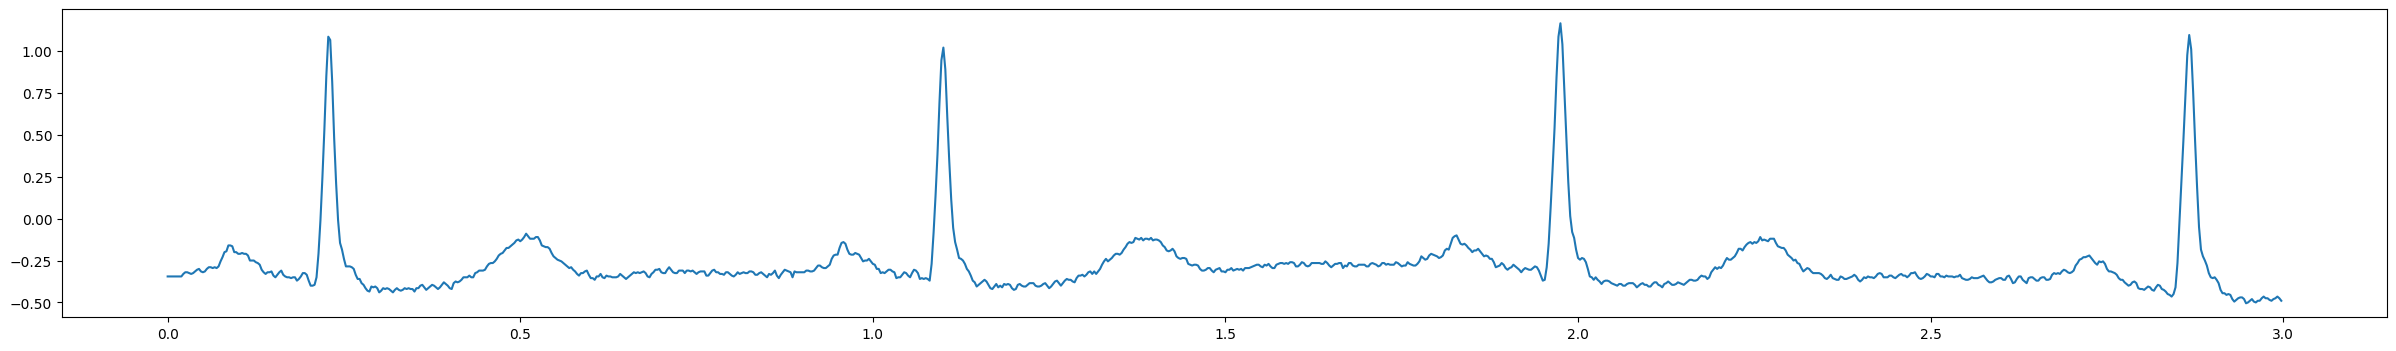

In [10]:
plt.figure(figsize=(30, 4))
plt.plot(t, record.p_signal[:1080,0])
#plt.plot(t, record.p_signal[:10800,1])

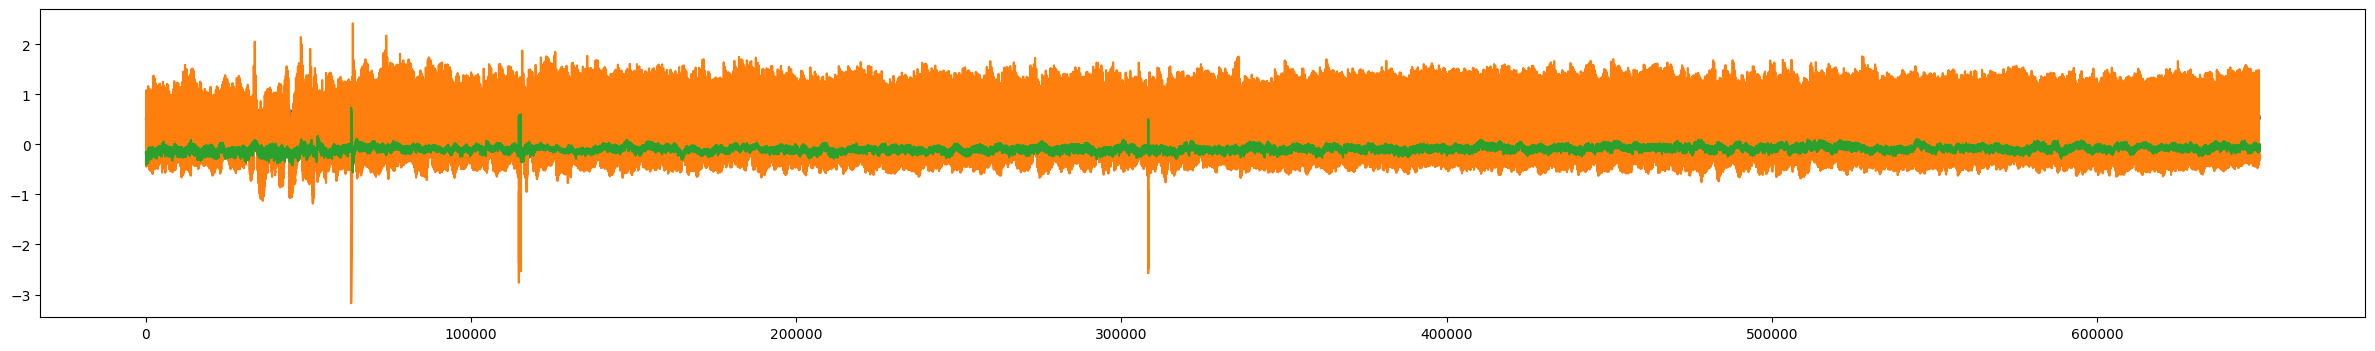

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1)).squeeze()
plt.figure(figsize=(30, 4))
plt.plot(lm)
plt.plot(record.p_signal)

In [9]:
qrs = wfdb.processing.XQRS(lm, fs=360)
qrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [10]:
ann = wfdb.rdann(data+"101", extension="atr")
(ann.__dict__)

{'record_name': '101',
 'extension': 'atr',
 'sample': array([     7,     83,    396, ..., 649004, 649372, 649751]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [11]:
set(ann.symbol)

{'+', 'A', 'N', 'Q', '|', '~'}

In [12]:
qrs.qrs_inds[130]

40339

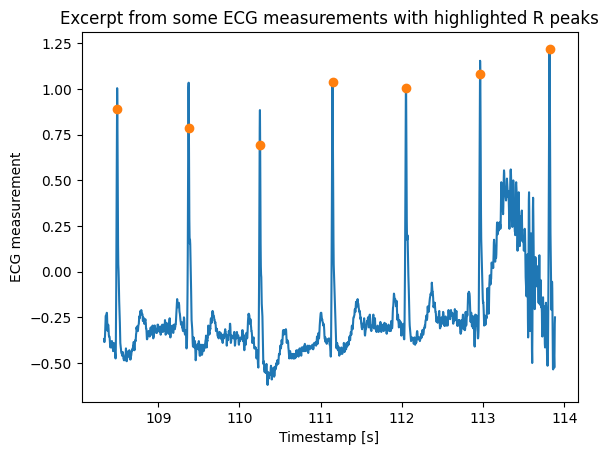

In [24]:
plt.figure()
plt.plot([t/360 for t in range(39000,41000)], record.p_signal[39000:41000,0])
#plt.plot(qrs.qrs_inds[qrs.qrs_inds<10800], record.p_signal[qrs.qrs_inds[qrs.qrs_inds<10800], 0], marker="o", linestyle="none")
#plt.plot(ann.sample[(ann.sample>=39000) & (ann.sample < 41000)], record.p_signal[ann.sample[(ann.sample>=39000) & (ann.sample < 41000)], 0], marker="o", linestyle="none")
plt.title("Excerpt from some ECG measurements with highlighted R peaks")
plt.plot([t/360 for t in qrs.qrs_inds[(qrs.qrs_inds>=39000)& (qrs.qrs_inds < 41000)]], record.p_signal[qrs.qrs_inds[(qrs.qrs_inds>=39000)& (qrs.qrs_inds < 41000)], 0], marker="o", linestyle="none")
plt.xlabel("Timestamp [s]")
plt.ylabel("ECG measurement")
plt.show()


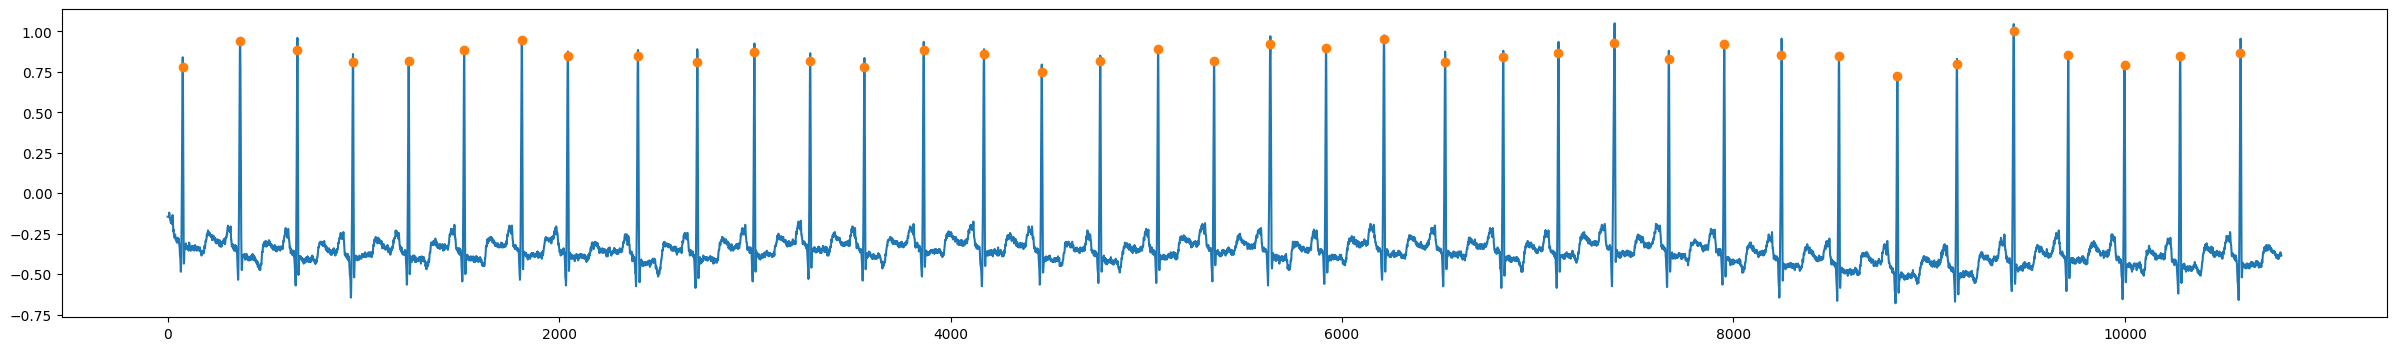

In [12]:
plt.figure(figsize=(30, 4))
plt.plot(record.p_signal[:10800,0])
plt.plot(qrs.qrs_inds[qrs.qrs_inds<10800], record.p_signal[qrs.qrs_inds[qrs.qrs_inds<10800], 0], marker="o", linestyle="none")

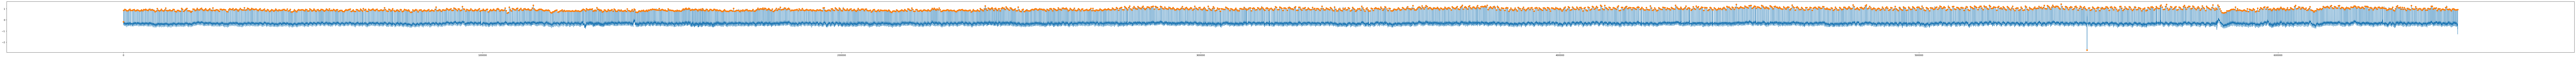

In [13]:
ann = wfdb.rdann(data+"100", extension="atr")
plt.figure(figsize=(200, 4))
plt.plot(record.p_signal[:,0])
plt.plot(ann.sample, record.p_signal[ann.sample, 0], marker="o", linestyle="none")
#plt.plot(qrs.qrs_inds[qrs.qrs_inds<108000], record.p_signal[qrs.qrs_inds[qrs.qrs_inds<108000], 0], marker="o", linestyle="none", c="blue")

[1904 1905 1906 1907 1908 1909 1910]
['N', 'N', 'N', 'V', 'N', 'N', 'N']


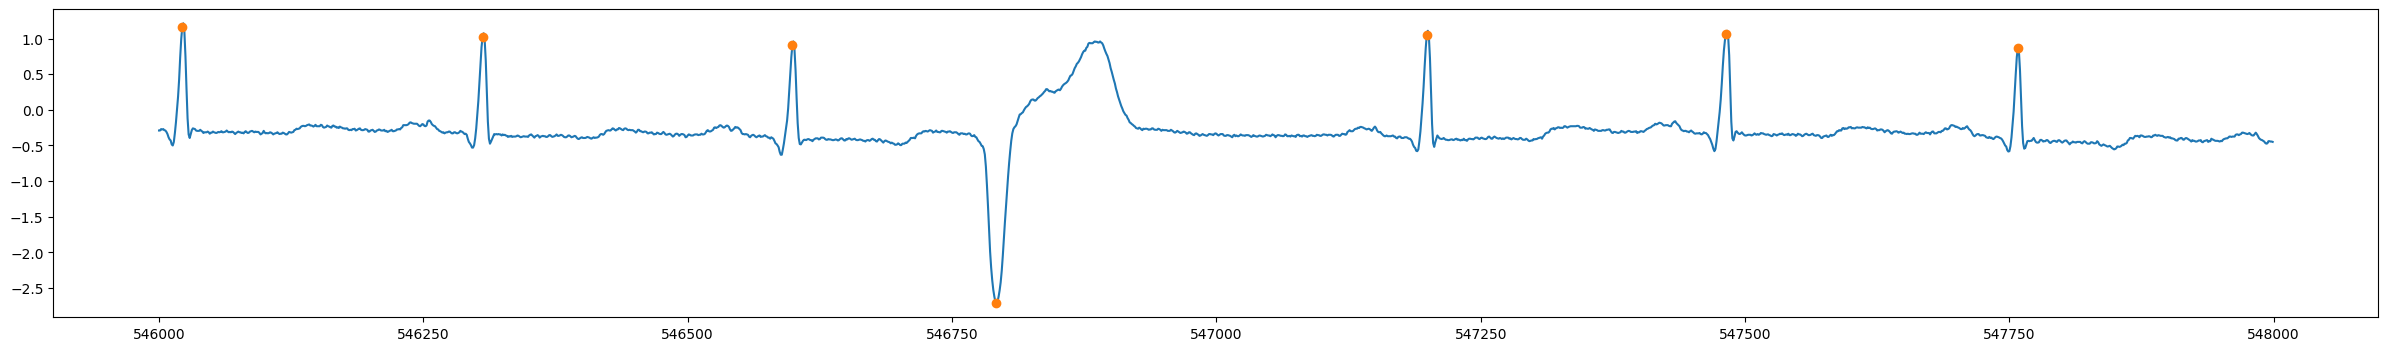

In [14]:
plt.figure(figsize=(30, 4))
plt.plot(range(546000,548000), record.p_signal[546000:548000,0])
plt.plot(ann.sample[(ann.sample>=546000) & (ann.sample < 548000)], record.p_signal[ann.sample[(ann.sample>=546000) & (ann.sample < 548000)], 0], marker="o", linestyle="none")
ann.sample[(ann.sample>=546000) & (ann.sample < 548000)]
inds, = np.where((ann.sample>=546000) & (ann.sample < 548000))
print(inds)
print([ann.symbol[i] for i in inds])

In [12]:
def find_ann(peak, d1, d2, ann_list, ann_sym):
    if ((ann_list>int(peak - d1/2)) &  (ann_list<int(peak + d2/2))).sum() != 1:
        return "0 or more than 1 annotation"
    ind, = np.where((ann_list>int(peak - d1/2)) &  (ann_list<int(peak + d2/2)))[0]
    return ann_sym[ind]

In [16]:
for i, peak in enumerate(qrs.qrs_inds[1:-1]):
    d2 = qrs.qrs_inds[i+1] - peak
    d1 = peak - qrs.qrs_inds[i-1]
    find_ann(peak, d1, d2, ann.sample, ann.symbol)

In [13]:
df = []
ann_list = []
window_size = 180 # seems to be common
skipping_count = 0
for pat_id in patients:
    print('record number', pat_id)
    record = wfdb.rdrecord(data+pat_id,smooth_frames=True)
    ann = wfdb.rdann(data+pat_id, extension="atr")
    min_max_scaler = preprocessing.MinMaxScaler()
    lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1)).squeeze()
    qrs = wfdb.processing.XQRS(lm, fs=360)
    qrs.detect()
    peaks = qrs.qrs_inds

    # for i, ann_idx in enumerate(ann.sample[1:-1]):
    #     d2 = ann.sample[i+2] - ann_idx
    #     d1 = ann_idx - ann.sample[i]
    #     start,end = ann_idx-d1//2, ann_idx+d2//2
    #     df.append(list(lm[start:end]))
    #     beat_type = ann.symbol[i+1] if ann.symbol[i+1]=="N" else "A" 

    #     ann_list.append(beat_type)

    
    for i, peak in enumerate(peaks[1:-1]):
       d2 = qrs.qrs_inds[i+2] - peak  # we start at peaks[1] but i starts at 0
       d1 = peak - qrs.qrs_inds[i]
       start,end = peak-window_size//2, peak+window_size//2
       beat_type = find_ann(peak, d1, d2, ann.sample, ann.symbol)
       if beat_type=="0 or more than 1 annotation":
            #print("skipping")
            #print(i)
            skipping_count += 1
            continue
            plt.figure()
            plt.plot(lm[peak-d1:peak+d2])
            plt.show()
            break
       beat_type = "N" if beat_type in normal else "A"
       ann_list.append(beat_type)
       df.append(list(lm[start:end]))

print(f"skipping {skipping_count} beats")


record number 100
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 101
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 102
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 103
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 104
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 105
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Runni

In [14]:
len(df)

106008

In [15]:
len(ann_list)

106008

In [16]:
set(ann_list)

{'A', 'N'}

In [17]:
ann_list.count("N")

87968

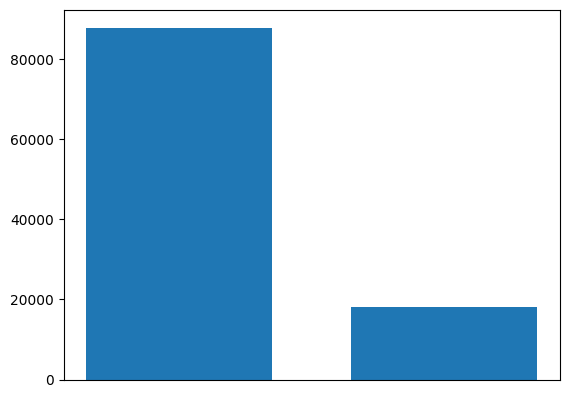

In [18]:
plt.hist(ann_list, bins=len(set(ann_list)), rwidth=0.7, align="mid")
plt.xticks(rotation=90)
plt.show()

'N'

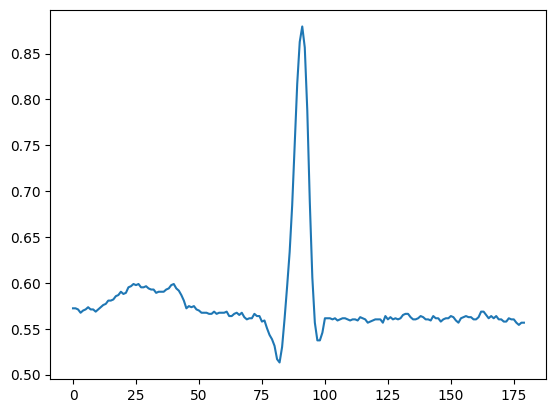

In [19]:
plt.plot(df[23])
ann_list[23]

'N'

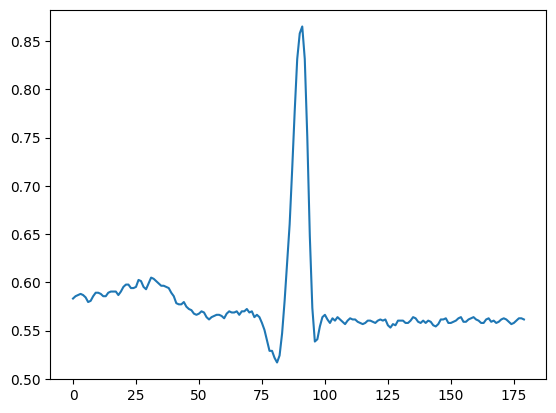

In [21]:
plt.plot(df[6])
ann_list[67]

In [22]:
label_df = pd.DataFrame(ann_list, columns=["label"])
(label_df.label=="N").tolist()

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [23]:
seq_df = pd.DataFrame(df, columns=[f"t_{i}" for i in range(window_size)])
seq_df.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_170,t_171,t_172,t_173,t_174,t_175,t_176,t_177,t_178,t_179
0,0.580723,0.579518,0.581928,0.580723,0.584337,0.581928,0.581928,0.580723,0.580723,0.584337,...,0.553012,0.555422,0.554217,0.551807,0.553012,0.549398,0.550602,0.550602,0.553012,0.550602
1,0.574699,0.571084,0.571084,0.568675,0.569880,0.572289,0.574699,0.572289,0.572289,0.572289,...,0.557831,0.554217,0.556627,0.556627,0.555422,0.554217,0.553012,0.553012,0.551807,0.554217
2,0.563855,0.561446,0.568675,0.567470,0.568675,0.567470,0.567470,0.565060,0.567470,0.571084,...,0.566265,0.565060,0.563855,0.561446,0.560241,0.560241,0.563855,0.566265,0.561446,0.562651
3,0.571084,0.571084,0.569880,0.568675,0.571084,0.574699,0.574699,0.573494,0.573494,0.572289,...,0.556627,0.551807,0.551807,0.551807,0.553012,0.551807,0.545783,0.546988,0.545783,0.549398
4,0.572289,0.572289,0.572289,0.575904,0.575904,0.575904,0.571084,0.569880,0.572289,0.574699,...,0.557831,0.559036,0.559036,0.556627,0.555422,0.551807,0.551807,0.555422,0.555422,0.553012


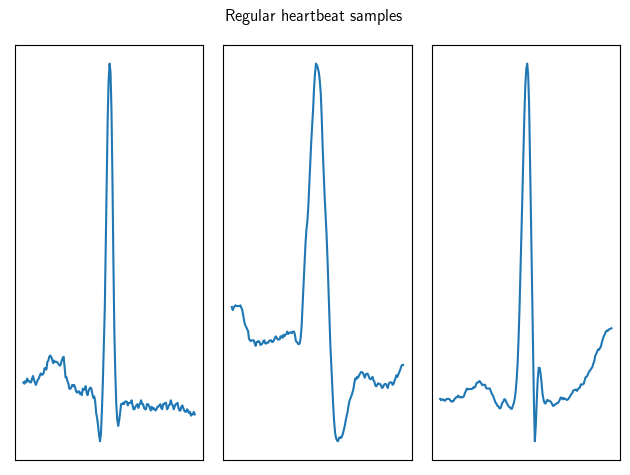

In [40]:
plt.figure()
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(seq_df[label_df.label=="N"].values.tolist()[12332*i])
    plt.xticks([])
    plt.yticks([])
plt.suptitle(r"Regular heartbeat samples", usetex=True)
plt.tight_layout()
plt.show()

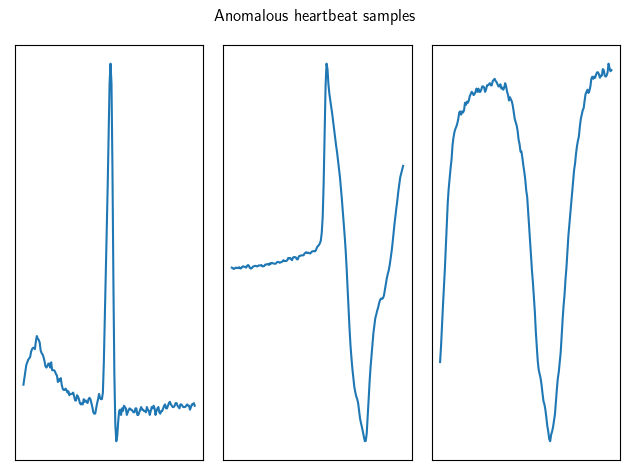

In [51]:
plt.figure()
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(seq_df[label_df.label=="A"].values.tolist()[4541*i+3])
    plt.xticks([])
    plt.yticks([])
plt.suptitle(r"Anomalous heartbeat samples", usetex=True)
plt.tight_layout()
plt.show()

In [62]:
normal_train, normal_test, y_train, y_test = train_test_split(seq_df[label_df.label=="N"], label_df[label_df.label=="N"], test_size=0.1, random_state=1)
normal_train, normal_val, y_train, y_val = train_test_split(normal_train, y_train, test_size=0.1, random_state=1)

In [63]:
print(f"train set (only normal): {len(normal_train)}")
print(f"val set (only normal): {len(normal_val)}")
print(f"test set (normal): {len(normal_test)}")
print(f"test set (anomaly): {len(seq_df[label_df.label!='N'])}")

train set (only normal): 71253
val set (only normal): 7918
test set (normal): 8797
test set (anomaly): 18040


In [64]:
anomalie_test = seq_df[label_df.label!='N']
anomalie_test_lables = label_df[label_df.label!='N']

In [67]:
len(normal_val)

7918

In [66]:
pd.DataFrame(normal_train).to_csv(f"data/normal_train_{window_size}_cleaned.csv")
pd.DataFrame(y_train).to_csv(f"data/train_labels_{window_size}_cleaned.csv")

pd.DataFrame(normal_val).to_csv(f"data/normal_val_{window_size}_cleaned.csv")
pd.DataFrame(y_val).to_csv(f"data/val_labels_{window_size}_cleaned.csv")

pd.DataFrame(normal_test).to_csv(f"data/normal_test{window_size}_cleaned.csv")
pd.DataFrame(y_test).to_csv(f"data/normal_labels_{window_size}_cleaned.csv")

pd.DataFrame(anomalie_test).to_csv(f"data/anomalie_test{window_size}_cleaned.csv")
pd.DataFrame(anomalie_test_lables).to_csv(f"data/anomalie_labels_{window_size}_cleaned.csv")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, ann_list, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=1)

#X_train, X_test = train_test_split(df, test_size=0.2, random_state=1)

#X_train, X_val = train_test_split(X_train, test_size=0.1111, random_state=1)


In [26]:
print(f"train set: {len(X_train)}")
print(f"val set: {len(X_val)}")
print(f"test set: {len(X_test)}")

train set: 77720
val set: 9715
test set: 21859


In [27]:
print(f"Test:  Anomaly {y_test.count('A')} Normal {y_test.count('N')}")
print(f"Train:  Anomaly {y_train.count('A')} Normal {y_train.count('N')}")
print(f"Val:  Anomaly {y_val.count('A')} Normal {y_val.count('N')}")

Test:  Anomaly 501 Normal 14652
Train:  Anomaly 1769 Normal 51862
Val:  Anomaly 212 Normal 6422


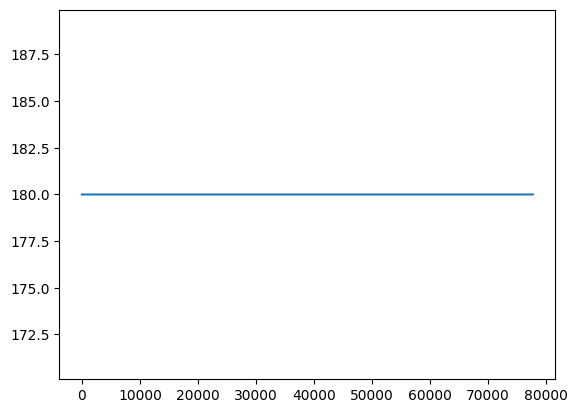

In [28]:
plt.plot([len(seq) for seq in X_train])

'0 or more than 1 annotation'

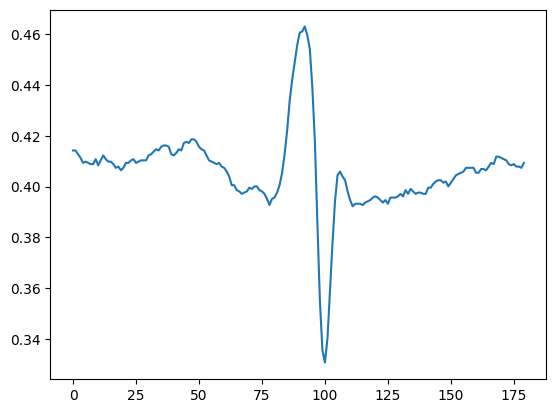

In [61]:
plt.plot(X_train[4669])
y_train[4669]

In [31]:
count = 0
for i, seq in enumerate(X_train):
    if len(seq) < 180:
        plt.plot(seq)
        print(y_train[i])
        count+=1
print(count)

0


In [32]:
pd.DataFrame(X_train).to_csv(f"data/mit_bih_train_{window_size}.csv")
pd.DataFrame(y_train).to_csv(f"data/beat_type_train_{window_size}.csv")

pd.DataFrame(X_test).to_csv(f"data/mit_bih_test_{window_size}.csv")
pd.DataFrame(y_test).to_csv(f"data/beat_type_test_{window_size}.csv")

pd.DataFrame(X_val).to_csv(f"data/mit_bih_val_{window_size}.csv")
pd.DataFrame(y_val).to_csv(f"data/beat_type_val_{window_size}.csv")



In [140]:
pd.DataFrame(X_train, columns=[f"t_{i}" for i in range(window_size)]).to_csv("data/mit_bih_train.csv")
pd.DataFrame(y_train, columns=["beat_type"]).to_csv("data/beat_type_train.csv")

pd.DataFrame(X_test, columns=[f"t_{i}" for i in range(window_size)]).to_csv("data/mit_bih_test.csv")
pd.DataFrame(y_test, columns=["beat_type"]).to_csv("data/beat_type_test.csv")

pd.DataFrame(X_val, columns=[f"t_{i}" for i in range(window_size)]).to_csv("data/mit_bih_val.csv")
pd.DataFrame(y_val, columns=["beat_type"]).to_csv("data/beat_type_val.csv")

pd.DataFrame(df, columns=[f"t_{i}" for i in range(window_size)]).to_csv("data/mit_bih.csv")
